In [82]:
# Import relevant packages
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors
from scipy.stats import norm
import json

In [83]:
tree=json.load(open("/Users/isaac/Desktop/10TeVMCDataAnalysis/Occupancy/NewData(v0)/occupancyRate.json"))

In [84]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [85]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [86]:
plt.rcParams.update({'font.size': 20,
                    'xtick.labelsize' : 50,
                    'ytick.labelsize' : 50,
                    'xtick.major.size' : 10,
                    'ytick.major.size' : 10,
                    'xtick.minor.size' : 5,
                    'ytick.minor.size' : 5,
                    'axes.labelsize' : 50,
                    'axes.titlesize' : 50}) 

# Investigating per layer occupancy rates

In [87]:
surfacearea=layer_area = np.array([270.40, 270.40, 448.50, 655.20, 904.80,  # VXD barrel
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,  # VXD endcaps
                      389.00, 389.00, 378.96, 378.96, 364.36, 364.36, 312.48, 312.48,
                      8117.85, 22034.16, 51678.81,  # IT barrel
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,  # IT endcaps
                      6639.65, 10611.59, 10078.04, 9900.19, 9307.37, 8595.98, 8299.56,
                      140032.91, 194828.39, 249623.88,  # OT barrel
                      69545.45, 69545.45, 69545.45, 69545.45,  # OT endcaps
                      69545.45, 69545.45, 69545.45, 69545.45])

In [88]:
print(tree)

[[10632.891, 9412.374, 6348.835, 0.0, 5076.977, 0.0, 4256.377, 0.0], [2295.358, 2294.16, 3141.684, 3117.529, 4248.306, 4168.74, 3493.566, 3492.02, 2294.761, 2263.048, 3145.065, 3100.203, 4275.313, 4179.634, 3497.504, 3502.635], [62109.147, 28922.492, 25092.821], [13802.11, 14289.045, 11700.006, 8590.791, 6886.702, 4838.508, 4219.026, 13863.484, 14136.292, 11729.726, 8405.697, 7118.277, 4877.602, 4262.0], [30337.495, 21453.497, 14301.429], [6460.016, 11694.255, 11078.103, 10749.848, 6449.911, 11676.492, 10851.074, 10673.765]]


In [89]:
hits=[]
for numi,i in enumerate(tree):
    for numj,j in enumerate(i):
        if (numi != 0) | ((numj !=3) & (numj !=5) & (numj !=7)):
            hits.append(j)

In [90]:
print(hits)

[10632.891, 9412.374, 6348.835, 5076.977, 4256.377, 2295.358, 2294.16, 3141.684, 3117.529, 4248.306, 4168.74, 3493.566, 3492.02, 2294.761, 2263.048, 3145.065, 3100.203, 4275.313, 4179.634, 3497.504, 3502.635, 62109.147, 28922.492, 25092.821, 13802.11, 14289.045, 11700.006, 8590.791, 6886.702, 4838.508, 4219.026, 13863.484, 14136.292, 11729.726, 8405.697, 7118.277, 4877.602, 4262.0, 30337.495, 21453.497, 14301.429, 6460.016, 11694.255, 11078.103, 10749.848, 6449.911, 11676.492, 10851.074, 10673.765]


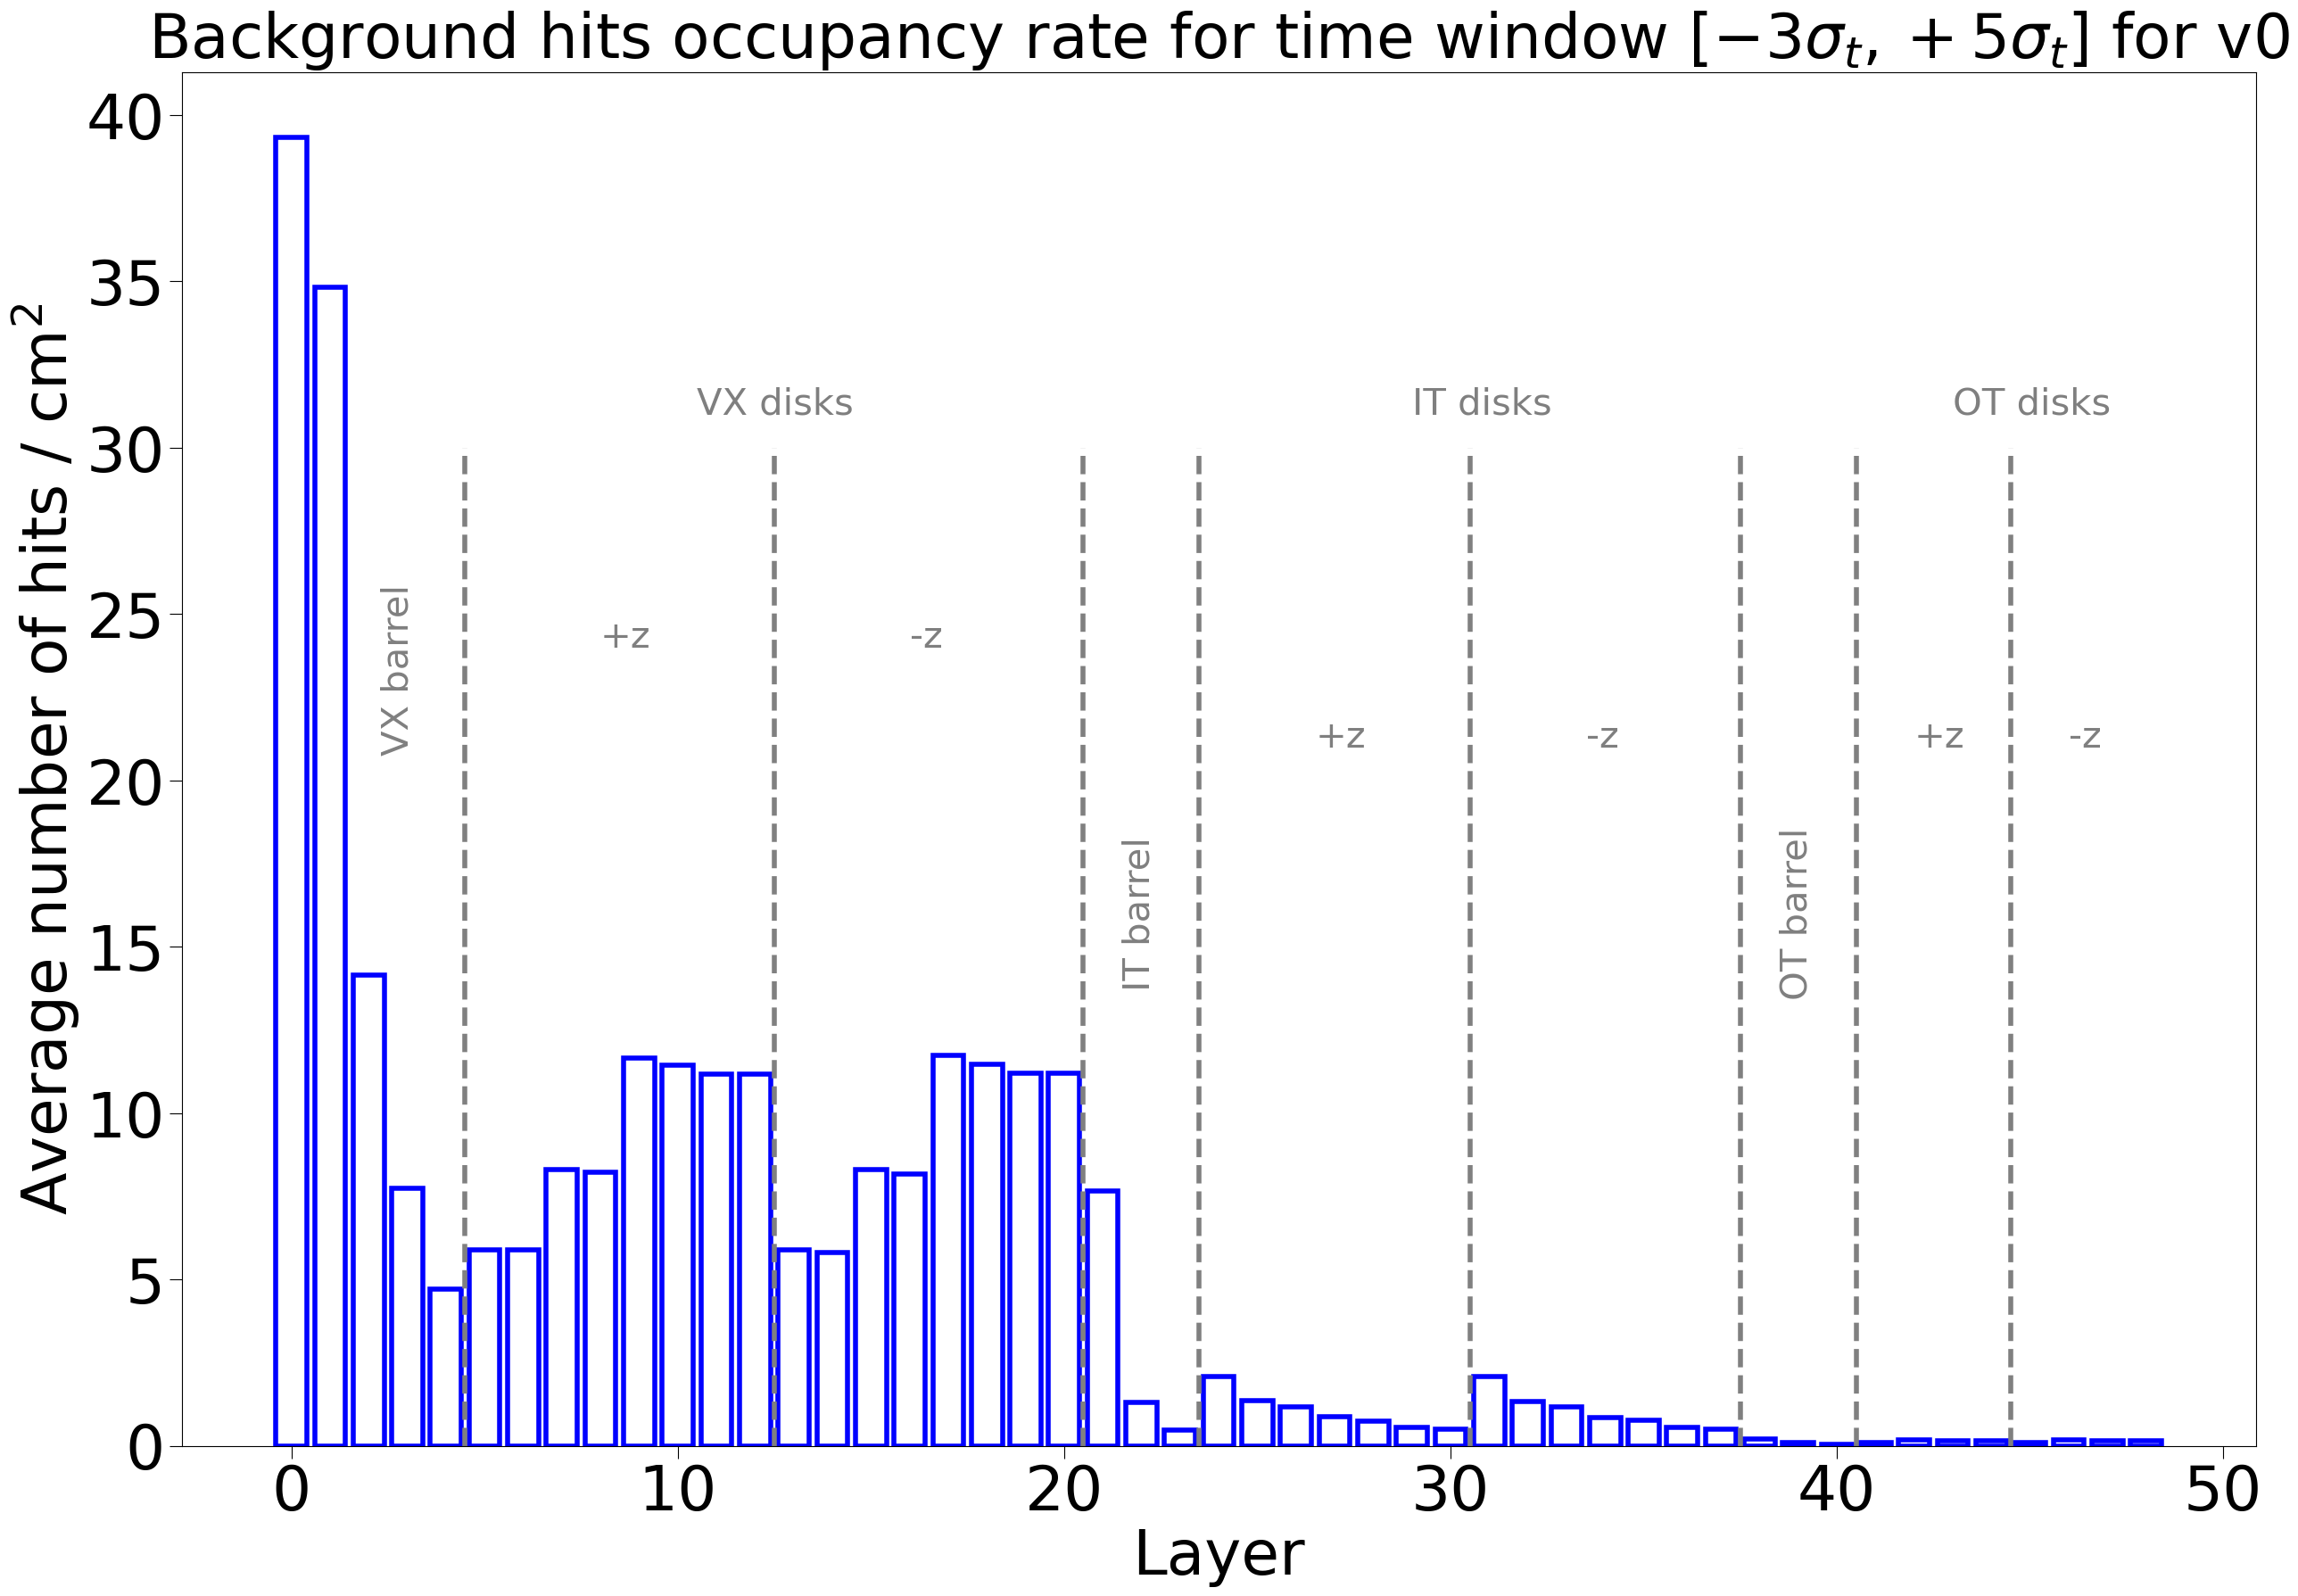

In [92]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111)

ax.bar(range(49), (hits/surfacearea), fill=False, linewidth=4, edgecolor="blue")

ax.vlines(4.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(2.3,21, "VX barrel", fontsize=30, rotation=90, alpha=0.5)
ax.vlines(12.50, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(10.5,31, "VX disks", fontsize=30, alpha=0.5)
ax.vlines(20.50, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(8,24, "+z", fontsize=30, alpha=0.5)
ax.text(16,24, "-z", fontsize=30, alpha=0.5)
ax.vlines(23.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(21.5,16, "IT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)
ax.vlines(30.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(29,31, "IT disks", fontsize=30, alpha=0.5)
ax.vlines(37.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(26.5,21, "+z", fontsize=30, alpha=0.5)
ax.text(33.5,21, "-z", fontsize=30, alpha=0.5)
ax.vlines(40.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(38.5,16, "OT barrel", fontsize=30, rotation=90, va='center', alpha=0.5)
ax.vlines(44.5, ymin=0, ymax=30, colors="grey", linestyle="dashed", linewidth=4)
ax.text(43,31, "OT disks", fontsize=30, alpha=0.5)
ax.text(42,21, "+z", fontsize=30, alpha=0.5)
ax.text(46,21, "-z", fontsize=30, alpha=0.5)


ax.set_ylabel(f"Average number of hits / cm$^2$")
ax.set_xlabel("Layer")
ax.set_title("Background hits occupancy rate for time window $[-3\sigma_t,+5\sigma_t]$ for v0")
plt.savefig("occupancy.png")